### Do cross validation for all channels and combined with one channel.
1. check which ECOG channel has better performance
2. check which LFP channel has better performance
3. compare them

In [14]:
nx = n1 = 8
i = 30
k_folds = 5

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PSID
from PSID.evaluation import evalPrediction
from train_PSID import train, plot_movement_pred
from cross_validation_PSID import cross_validation
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
PATH_FEATURES_S0 = "/home/lauraflyra/Documents/BCCN/Lab_Rotation_USC/Code/Data/py_neuromodulation_derivatives/sub-000_ses-right_task-force_run-3/sub-000_ses-right_task-force_run-3_FEATURES.csv"
data_features_s0 = pd.read_csv(PATH_FEATURES_S0, index_col=0)

In [17]:
lfp_s0 = ['LFP_RIGHT_0-LFP_RIGHT_2',
       'LFP_RIGHT_1-LFP_RIGHT_0',
       'LFP_RIGHT_2-LFP_RIGHT_1']

In [18]:
ecog_s0 = ['ECOG_RIGHT_0','ECOG_RIGHT_1','ECOG_RIGHT_2','ECOG_RIGHT_3','ECOG_RIGHT_4','ECOG_RIGHT_5']

In [19]:
behavior_s0 = data_features_s0["MOV_LEFT_CLEAN"].to_numpy().reshape(-1, 1)

In [20]:
evals = []
for ecog_ch in ecog_s0:
    df = data_features_s0.filter(like=ecog_ch).filter(like='bandpass_activity').to_numpy()
    eval = cross_validation(neural_data = df, behavior= behavior_s0, k_folds=5, nx = nx,n1 = n1, i=i, metrics='R2')
    evals.append(eval)

Behavior decoding evaluation:
  PSID => 0.607
Behavior decoding evaluation:
  PSID => 0.649
Behavior decoding evaluation:
  PSID => 0.724
Behavior decoding evaluation:
  PSID => 0.631
Behavior decoding evaluation:
  PSID => 0.683
Behavior decoding evaluation:
  PSID => 0.446
Behavior decoding evaluation:
  PSID => 0.666
Behavior decoding evaluation:
  PSID => 0.579
Behavior decoding evaluation:
  PSID => 0.633
Behavior decoding evaluation:
  PSID => 0.595
Behavior decoding evaluation:
  PSID => 0.471
Behavior decoding evaluation:
  PSID => 0.54
Behavior decoding evaluation:
  PSID => 0.462
Behavior decoding evaluation:
  PSID => 0.453
Behavior decoding evaluation:
  PSID => 0.529
Behavior decoding evaluation:
  PSID => 0.428
Behavior decoding evaluation:
  PSID => 0.614
Behavior decoding evaluation:
  PSID => 0.522
Behavior decoding evaluation:
  PSID => 0.538
Behavior decoding evaluation:
  PSID => 0.547
Behavior decoding evaluation:
  PSID => 0.363
Behavior decoding evaluation:
  PSI

In [23]:
df_all_ecog = data_features_s0.filter(like='ECOG').filter(like='bandpass_activity').to_numpy()
behavior_s0 = data_features_s0["MOV_LEFT_CLEAN"].to_numpy().reshape(-1, 1)
eval_all_ecog = cross_validation(neural_data = df_all_ecog, behavior= behavior_s0, k_folds=5, nx = nx,n1 = n1, i=i, metrics='R2')

Behavior decoding evaluation:
  PSID => 0.576
Behavior decoding evaluation:
  PSID => 0.711
Behavior decoding evaluation:
  PSID => 0.714
Behavior decoding evaluation:
  PSID => 0.608
Behavior decoding evaluation:
  PSID => 0.681


In [36]:
evals = np.array(evals)
std = np.std(evals, axis = 1)
mean = np.mean(evals, axis = 1)

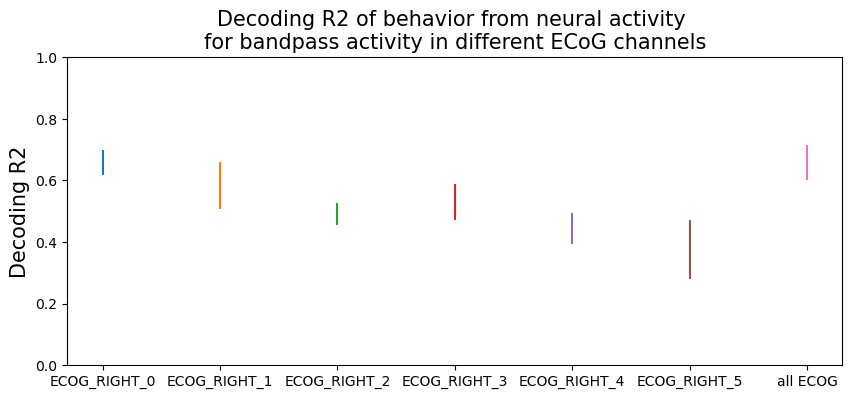

In [43]:
plt.figure(figsize=(10,4))
for idx, ecog_ch in enumerate(ecog_s0):
    plt.errorbar([ecog_ch], mean[idx], std[idx])
plt.errorbar(['all ECOG'], np.mean(eval_all_ecog), np.std(eval_all_ecog))
plt.ylim(0, 1)
plt.ylabel("Decoding R2", fontsize=15)
plt.title(
        "Decoding R2 of behavior from neural activity \nfor bandpass activity in different ECoG channels",
        fontsize=15)
plt.show()


In [44]:
evals_lfp = []
for lfp_ch in lfp_s0:
    df = data_features_s0.filter(like=lfp_ch).filter(like='bandpass_activity').to_numpy()[1:]
    eval = cross_validation(neural_data = df, behavior= behavior_s0[1:], k_folds=5, nx = nx,n1 = n1, i=i, metrics='R2')
    evals_lfp.append(eval)

Behavior decoding evaluation:
  PSID => 0.29
Behavior decoding evaluation:
  PSID => 0.412
Behavior decoding evaluation:
  PSID => 0.187
Behavior decoding evaluation:
  PSID => 0.253
Behavior decoding evaluation:
  PSID => 0.254
Behavior decoding evaluation:
  PSID => 0.382
Behavior decoding evaluation:
  PSID => 0.432
Behavior decoding evaluation:
  PSID => 0.256
Behavior decoding evaluation:
  PSID => 0.287
Behavior decoding evaluation:
  PSID => 0.198
Behavior decoding evaluation:
  PSID => 0.235
Behavior decoding evaluation:
  PSID => 0.327
Behavior decoding evaluation:
  PSID => 0.299
Behavior decoding evaluation:
  PSID => 0.227
Behavior decoding evaluation:
  PSID => 0.156


In [45]:
evals_lfp = np.array(evals_lfp)
std_lfp = np.std(evals_lfp, axis = 1)
mean_lfp = np.mean(evals_lfp, axis = 1)

In [46]:
df_all_lfp = data_features_s0.filter(like='LFP').filter(like='bandpass_activity').to_numpy()[1:]
eval_all_lfp = cross_validation(neural_data=df, behavior=behavior_s0[1:], k_folds=5, nx=nx, n1=n1, i=i, metrics='R2')

Behavior decoding evaluation:
  PSID => 0.235
Behavior decoding evaluation:
  PSID => 0.327
Behavior decoding evaluation:
  PSID => 0.299
Behavior decoding evaluation:
  PSID => 0.227
Behavior decoding evaluation:
  PSID => 0.156


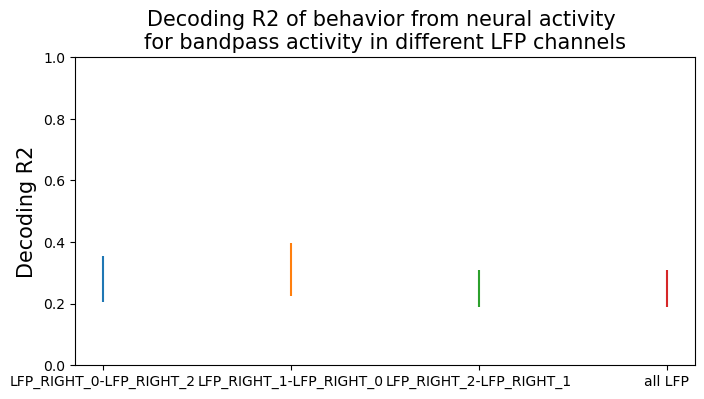

In [57]:
plt.figure(figsize=(8,4))
for idx, lfp_ch in enumerate(lfp_s0):
    plt.errorbar([lfp_ch], mean_lfp[idx], std_lfp[idx])
plt.errorbar(['all LFP'], np.mean(eval_all_lfp), np.std(eval_all_lfp))
plt.ylim(0, 1)
plt.ylabel("Decoding R2", fontsize=15)
plt.title(
        "Decoding R2 of behavior from neural activity \nfor bandpass activity in different LFP channels",
        fontsize=15)
plt.show()

# Combine best LFP and best ECOG

Behavior decoding evaluation:
  PSID => 0.656
Behavior decoding evaluation:
  PSID => 0.664
Behavior decoding evaluation:
  PSID => 0.715
Behavior decoding evaluation:
  PSID => 0.605
Behavior decoding evaluation:
  PSID => 0.655


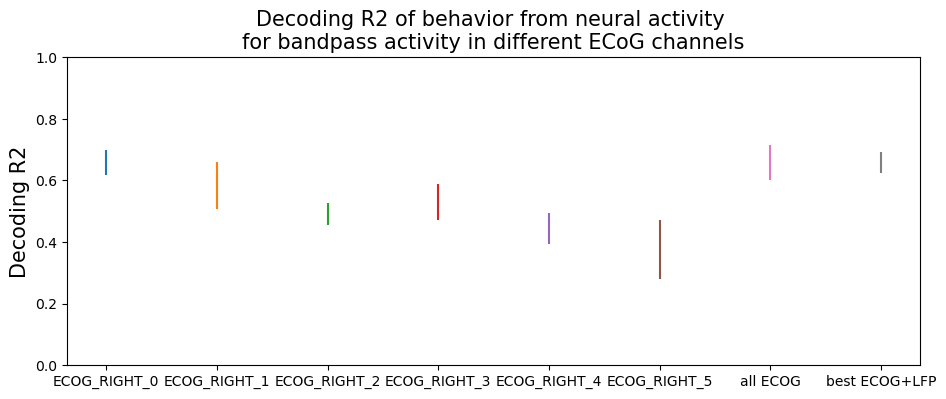

In [59]:
df = pd.concat([data_features_s0.filter(like='ECOG_RIGHT_0'),data_features_s0.filter(like='LFP_RIGHT_1-LFP_RIGHT_0')], axis =1 ).filter(like='bandpass_activity').to_numpy()
eval_ecog_lfp = cross_validation(neural_data=df, behavior=behavior_s0, k_folds=5, nx=nx, n1=n1, i=i, metrics='R2')

plt.figure(figsize=(11, 4))
for idx, ecog_ch in enumerate(ecog_s0):
    plt.errorbar([ecog_ch], mean[idx], std[idx])
plt.errorbar(['all ECOG'], np.mean(eval_all_ecog), np.std(eval_all_ecog))
plt.errorbar(['best ECOG+LFP'], np.mean(eval_ecog_lfp), np.std(eval_ecog_lfp))
plt.ylim(0, 1)
plt.ylabel("Decoding R2", fontsize=15)
plt.title(
    "Decoding R2 of behavior from neural activity \nfor bandpass activity in different ECoG channels",
    fontsize=15)
plt.show()